## Phase 5 Capstone Project: Jumia Phone Price Prediction: Optimizing Retail Strategies through Data Analytics

![Project Image](Black_Friday.jpg)

# 1.0 Business Understanding

## 1.1 Background
The e-commerce landscape in Africa has witnessed significant growth in recent years with platforms like Jumia leading the charge. As one of the continent's largest online marketplaces, Jumia hosts over 100,000 retailers, all vying for consumer attention in a highly competitive environment. The dynamics of pricing strategy have become increasingly complex, particularly in categories like electronics where demand is sensitive to pricing fluctuations. Retailers must navigate not only the prices set by their competitors but also various factors such as consumer demand, seasonal sales and promotional events.

As the November Black Friday sales event approaches, the pressure intensifies for retailers to optimize their pricing strategies to capture market share while ensuring profitability. However, the traditional methods of price evaluation can be cumbersome and time-consuming, often relying on manual research or outdated tools. This inefficiency can result in missed opportunities for sales and reduced competitiveness.

## 1.2 Problem Statement
Retailers on Jumia are struggling to establish effective pricing strategies due to intense competition and rapidly changing market conditions. Current pricing evaluation methods are slow and lack necessary data-driven insights, which is particularly pressing with Black Friday approaching. To tackle this challenge, we aim to create a predictive pricing model using historical sales data, competitor pricing, and market trends. This model will automate pricing evaluations, allowing retailers to efficiently set competitive prices and improve their performance on the Jumia platform during peak sales periods. Ultimately, the project seeks to equip retailers with essential tools for success in the competitive e-commerce landscape.

## 1.3 Objectives
>- Identify factors contributing to higher product visibility and marketability on Jumia’s first top pages.
>- Explore the relationship between phone features and customer reviews.
>- Develop a predictive model to recommend competitive, optimal pricing that promotes first-page placement.
>- Assess the potential relationship between buyer ratings and product pricing.

# 2.0 Data Understanding
The data for this project was scraped on October 31, 2024, from the Jumia Kenya e-commerce platform, specifically in the smartphones category and organized by popularity from the first to the last page. This process yielded a total of 12,000 listed devices. For a detailed review of the complete code used in the web scraping process, please refer to the following link: [Web Scraping Script](Scrapped_data.ipynb) The packages utilized in this project included Beautiful Soup and Pandas. The extracted [Data](https://github.com/N-kioko/Smartphones_Price_Prediction_and_Discount_Analysis_Project/blob/main/Data/jumia_phones.csv) was saved in CSV format on our local machine as `jumia_phones.csv`, and consists of the following features:

* **Name:** This describes the brand and the features of the phone.
* **Price:** This describes the current price the phone retails at.
* **Old Price:** This describes the previous price of the phone.
* **Discount:** The % discount calculated
* **Rating:** The buyers explicit rating of the product and service.
* **Number of Reviews:** The number of reviews from possible buyers.
* **Search Ranking:** The page and position of the product in terms of listing and popularity.

The Name column contains unstructured text, combining brand names and product specifications (e.g., “Samsung Galaxy A12, 5000mAh, 128GB ROM, 6GB RAM”). To transform these into separate, structured attributes, we shall use Regex as it allows for consistent pattern matching, enabling the extraction of information such as battery capacity (e.g. numbers followed by "mAh") and storage (e.g. "GB" or "MB"), making data more structured and accessible for analysis.

Data Limitation:

* **Dynamic Pricing:** Prices on e-commerce platforms fluctuate frequently. Therefore, the scraped prices reflect only the prices at the time of scraping and may not represent current or future values.
* **Incomplete or Inconsistent Data:** Due to the variety of phone models and brands, some listings may lack uniform information (e.g., missing battery details or memory specifications), which could lead to variability in the parsed features.
* **Unverified Ratings and Reviews:** Ratings and reviews might be biased or manipulated, affecting any insights or model predictions derived from them.
* **Potential Duplicate Listings:** Duplicate or near-duplicate entries may exist if the same model is listed by multiple sellers, which could influence popularity and ranking statistics.

In [1]:
# Import all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
# Loading the dataset
df = pd.read_csv('jumia_phones.csv')
# Checking the first few rows of the dataset
df.head()

,Name,Price,Old Price,Discount,Rating,Number of Reviews,Search Ranking
0,"XIAOMI Redmi A3, 6.71"", 3GB RAM + 64GB (Dual S...","KSh 11,000",NaN,NaN,4.1 out of 5,4.1 out of 5(220),"Page 1, Rank 1"
1,"Tecno Spark 20, Android 13, 6.6"", 128GB + 4GB ...","KSh 12,925","KSh 15,000",14%,4.4 out of 5,4.4 out of 5(135),"Page 1, Rank 2"
2,"Itel S23 6.6"", 128GB + 4GB RAM, 50MP Camera, (...","KSh 10,000",NaN,NaN,4.2 out of 5,4.2 out of 5(151),"Page 1, Rank 3"
3,"Samsung Galaxy A05, 6.7'' 4GB RAM + 128GB ROM ...","KSh 14,000",NaN,NaN,4.5 out of 5,4.5 out of 5(29),"Page 1, Rank 4"
4,"Itel S23 6.6"", 128GB + 4GB RAM, 50MP Camera, (...","KSh 10,000",NaN,NaN,4.3 out of 5,4.3 out of 5(249),"Page 1, Rank 5"


In [3]:
# Concise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               12000 non-null  object
 1   Price              12000 non-null  object
 2   Old Price          8101 non-null   object
 3   Discount           8101 non-null   object
 4   Rating             11700 non-null  object
 5   Number of Reviews  11700 non-null  object
 6   Search Ranking     12000 non-null  object
dtypes: object(7)
memory usage: 656.4+ KB


In [4]:
# Summary statistics for numerical columns
df.describe()

,Name,Price,Old Price,Discount,Rating,Number of Reviews,Search Ranking
count,12000,12000,8101,8101,11700,11700,12000
unique,40,34,19,22,12,38,12000
top,"XIAOMI Redmi A3, 6.71"", 3GB RAM + 64GB (Dual S...","KSh 10,000","KSh 29,999",45%,4.3 out of 5,4.6 out of 5(9),"Page 1, Rank 1"
freq,300,1500,1200,900,1800,600,1


## Observations

* Our DataFrame contains seven columns labeled '**Name**', '**Price**', '**Old Price**', '**Discount**', '**Rating**', '**Number of Reviews**' and '**Search Ranking**'
* Each column has a count of 12,000 entries except for Old Price, Discount, Rating and Number of Reviews which have 8,101, 8,101, 11,700 and 11,700 entries respectively. This suggests that there may be missing values in these columns.
* **Most Frequently Listed Product:** XIAOMI Redmi A3, 6.71", 3GB RAM + 64GB (Dual SIM) appears 300 times, indicating high popularity among sellers or consumers.
* **Common Price Point:** The most frequent price is KSh 10,000, suggesting a prevalent pricing strategy.
* **Common Discount Rate:** A discount rate of 45% is the most common, likely reflecting promotional tactics.
* **Frequent Rating:** The average rating is "4.3 out of 5," showing that products are generally well-reviewed.
* **Highest Rating Based on Few Reviews** The highest rating is "4.6 out of 5" based on only 9 reviews, indicating a small sample size.
* **Top Search Ranking:** The highest visibility is "Page 1, Rank 1," showcasing a product's prominence in search results.
* **Dominant Trends:** The frequency of certain products and prices suggests prevailing trends in consumer preferences and seller strategies.

# 3.0 Data Preparation

## 3.1 Data Cleaning

This section focuses on preparing the data for exploratory data analysis (EDA). We intend to:

* Efficiently extract and organize key product attributes/features from the product names column.
* Create a structured DataFrame containing essential details about each phone.
* Extract relevant numerical information from the '**Rating**', '**Number of Reviews**', and '**Search Ranking**' columns of the DataFrame for further analysis.

In [5]:
#Have the Name column in the variable name product_column
product_column = 'Name'  
# Define regex pattern to extract brand
pattern_brand = r"(?P<brand>[\w\s]+)(?=\+|,\s|\s|$)"
# Function to extract brand
def extract_brand(name):
    match = re.search(pattern_brand, name)
    return match.group('brand').strip() if match else None
# Extract brand
brand_df = df[product_column].apply(extract_brand).rename('Brand')
# Convert to lowercase and then title case for uniformity
brand_df = brand_df.str.lower().str.title()
# Define regex pattern to extract screen size
screen_size_pattern = r"(?P<screen_size>\d+(\.\d+)?)(?=['\"]{1,2})"
# Function to extract screen size
def extract_screen_size(name):
    match = re.search(screen_size_pattern, name)
    return match.group('screen_size').strip() if match else None
# Extract screen size
size_df = df[product_column].apply(extract_screen_size).rename('Screen Size')
# Define regex pattern to extract RAM
ram_pattern = r"\b(?P<RAM>\d\s?GB)\b"
# Function to extract RAM
def extract_ram(name):
    match = re.search(ram_pattern, name)
    return match.group('RAM').strip() if match else None
# Extract RAM
ram_df = df[product_column].apply(extract_ram).rename('RAM')
# Define regex pattern to extract ROM
rom_pattern = r"\b(?P<ROM>\d{2,}\s?GB)\b"
# Function to extract ROM
def extract_rom(name):
    match = re.search(rom_pattern, name)
    return match.group('ROM').strip() if match else None
# Extract ROM
rom_df = df[product_column].apply(extract_rom).rename('ROM')
# Define regex pattern to extract Color
color_pattern = r"[,-]\s*(?P<Color>([A-Z][a-z]+(?:\s[A-Z][a-z]+)*))\s*(?:\+.*)?(?=\s*\(|$)"
# Function to extract Color
def extract_color(name):
    match = re.search(color_pattern, name)
    return match.group('Color').strip() if match else None
# Extract Color
color_df = df[product_column].apply(extract_color).rename('Color')
# Define regex pattern for extracting Warranty
warranty_pattern = r"(\d+)\s*(?:YR|WRTY)"
# Function to extract Warranty
def extract_warranty(name):
    warranty_match = re.search(warranty_pattern, name)
    return warranty_match.group(1) if warranty_match else None
# Extract Warranty
warranty_df = df[product_column].apply(extract_warranty).rename('Warranty')
# Function to extract Camera
def extract_camera(name):
    camera_pattern = r'(\d+MP)'
    match = re.search(camera_pattern, name)
    return match.group(1).strip() if match else None
# Extract Camera
camera_df = df[product_column].apply(extract_camera).rename('Camera')
# Function to extract Battery
def extract_battery(name):
    battery_pattern = r'(\d{4}mAh)'
    match = re.search(battery_pattern, name)
    return match.group(1).strip() if match else None
# Extract Battery
battery_df = df[product_column].apply(extract_battery).rename('Battery Power')
# Function to extract Number of Sims
def extract_sim(name):
    sim_pattern = r'\(?(Dual\s+Sim|DUAL\s+SIM|Single\s+Sim|Single)\)?'
    match = re.search(sim_pattern, name)
    if match:
        return 2 if "Dual" in match.group(0) else 1
    return None
# Extract SIMs
sim_df = df[product_column].apply(extract_sim).rename('Number of SIMs')
# Concatenate extracted features with the original DataFrame (excluding the product column)
extracted_features_df = pd.concat(
    [brand_df, size_df, ram_df, rom_df, color_df, warranty_df, camera_df, battery_df, sim_df],
    axis=1
)
# Concatenate with the original DataFrame, excluding the product column
final_df = pd.concat(
    [extracted_features_df, df.drop(columns=[product_column])],
    axis=1
)
# Display the final DataFrame
final_df.head()

,Brand,Screen Size,RAM,ROM,Color,Warranty,Camera,Battery Power,Number of SIMs,Price,Old Price,Discount,Rating,Number of Reviews,Search Ranking
0,Xiaomi Redmi A3,6.71,3GB,64GB,Midnight Black,2,None,5000mAh,NaN,"KSh 11,000",NaN,NaN,4.1 out of 5,4.1 out of 5(220),"Page 1, Rank 1"
1,Tecno Spark 20,6.6,4GB,128GB,Gravity Black,1,50MP,5000mAh,NaN,"KSh 12,925","KSh 15,000",14%,4.4 out of 5,4.4 out of 5(135),"Page 1, Rank 2"
2,Itel S23,6.6,4GB,128GB,Mystery White,1,50MP,5000mAh,NaN,"KSh 10,000",NaN,NaN,4.2 out of 5,4.2 out of 5(151),"Page 1, Rank 3"
3,Samsung Galaxy A05,6.7,4GB,128GB,Black,None,50MP,5000mAh,2.0,"KSh 14,000",NaN,NaN,4.5 out of 5,4.5 out of 5(29),"Page 1, Rank 4"
4,Itel S23,6.6,4GB,128GB,Starry Black,None,50MP,5000mAh,NaN,"KSh 10,000",NaN,NaN,4.3 out of 5,4.3 out of 5(249),"Page 1, Rank 5"


In [6]:
# Clean the Rating column
final_df['Rating'] = final_df['Rating'].str.extract(r'(\d+\.\d+)')[0]

# Clean the Number of Reviews column to extract the number in parentheses
final_df['Number of Reviews'] = final_df['Number of Reviews'].str.extract(r'\((\d+)\)')[0]

# Define regex pattern to extract page and rank
pattern = r'Page (?P<Page>\d+), Rank (?P<Rank>\d+)'

# Extract page and rank into new columns
final_df[['Page', 'Rank']] = final_df['Search Ranking'].str.extract(pattern)

# Display the cleaned DataFrame
final_df.head()

,Brand,Screen Size,RAM,ROM,Color,Warranty,Camera,Battery Power,Number of SIMs,Price,Old Price,Discount,Rating,Number of Reviews,Search Ranking,Page,Rank
0,Xiaomi Redmi A3,6.71,3GB,64GB,Midnight Black,2,None,5000mAh,NaN,"KSh 11,000",NaN,NaN,4.1,220,"Page 1, Rank 1",1,1
1,Tecno Spark 20,6.6,4GB,128GB,Gravity Black,1,50MP,5000mAh,NaN,"KSh 12,925","KSh 15,000",14%,4.4,135,"Page 1, Rank 2",1,2
2,Itel S23,6.6,4GB,128GB,Mystery White,1,50MP,5000mAh,NaN,"KSh 10,000",NaN,NaN,4.2,151,"Page 1, Rank 3",1,3
3,Samsung Galaxy A05,6.7,4GB,128GB,Black,None,50MP,5000mAh,2.0,"KSh 14,000",NaN,NaN,4.5,29,"Page 1, Rank 4",1,4
4,Itel S23,6.6,4GB,128GB,Starry Black,None,50MP,5000mAh,NaN,"KSh 10,000",NaN,NaN,4.3,249,"Page 1, Rank 5",1,5


In [7]:
# Converting data types, handling null values, and checking for duplicates:

# Convert Screen Size and Rating to float
final_df['Screen Size'] = final_df['Screen Size'].astype(float)
final_df['Rating'] = final_df['Rating'].astype(float)

# Convert RAM and ROM to integer
final_df['RAM'] = final_df['RAM'].str.replace('GB', '').astype(int)
final_df['ROM'] = final_df['ROM'].str.replace('GB', '').astype(int)

# Convert Page and Rank to integer
final_df['Page'] = final_df['Page'].astype(int)
final_df['Rank'] = final_df['Rank'].astype(int)

# Convert Price and Old Price to float
final_df['Price'] = final_df['Price'].str.replace(r'[^\d]', '', regex=True).astype(float)
final_df['Old Price'] = final_df['Old Price'].str.replace(r'[^\d]', '', regex=True).astype(float)

# Convert Discount to float
final_df['Discount'] = final_df['Discount'].str.replace('%', '').astype(float)

# Convert the Number of Reviews to integers, filling null values with 0
final_df['Number of Reviews'] = final_df['Number of Reviews'].fillna(0).astype(float).astype(int)

# View the first 6 rows of the final set
final_df.head()

,Brand,Screen Size,RAM,ROM,Color,Warranty,Camera,Battery Power,Number of SIMs,Price,Old Price,Discount,Rating,Number of Reviews,Search Ranking,Page,Rank
0,Xiaomi Redmi A3,6.71,3,64,Midnight Black,2,None,5000mAh,NaN,11000.0,NaN,NaN,4.1,220,"Page 1, Rank 1",1,1
1,Tecno Spark 20,6.60,4,128,Gravity Black,1,50MP,5000mAh,NaN,12925.0,15000.0,14.0,4.4,135,"Page 1, Rank 2",1,2
2,Itel S23,6.60,4,128,Mystery White,1,50MP,5000mAh,NaN,10000.0,NaN,NaN,4.2,151,"Page 1, Rank 3",1,3
3,Samsung Galaxy A05,6.70,4,128,Black,None,50MP,5000mAh,2.0,14000.0,NaN,NaN,4.5,29,"Page 1, Rank 4",1,4
4,Itel S23,6.60,4,128,Starry Black,None,50MP,5000mAh,NaN,10000.0,NaN,NaN,4.3,249,"Page 1, Rank 5",1,5


In [8]:
# Inspect the shape of the final DataFrame
final_df_shape = final_df.shape
final_df_shape

(12000, 17)

In [9]:
# Display information about the DataFrame to confirm its structure and data types
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              12000 non-null  object 
 1   Screen Size        11100 non-null  float64
 2   RAM                12000 non-null  int32  
 3   ROM                12000 non-null  int32  
 4   Color              9600 non-null   object 
 5   Warranty           3000 non-null   object 
 6   Camera             8700 non-null   object 
 7   Battery Power      9300 non-null   object 
 8   Number of SIMs     3300 non-null   float64
 9   Price              12000 non-null  float64
 10  Old Price          8101 non-null   float64
 11  Discount           8101 non-null   float64
 12  Rating             10200 non-null  float64
 13  Number of Reviews  12000 non-null  int32  
 14  Search Ranking     12000 non-null  object 
 15  Page               12000 non-null  int32  
 16  Rank               120

In [10]:
# Now that the conversions are complete, let's review the statistical summary of the DataFrame
final_df_stats = final_df.describe()
final_df_stats

,Screen Size,RAM,ROM,Number of SIMs,Price,Old Price,Discount,Rating,Number of Reviews,Page,Rank
count,11100.000000,12000.000000,12000.000000,3300.000000,12000.000000,8101.000000,8101.000000,10200.000000,12000.000000,12000.000000,12000.000000
mean,6.576216,4.500000,128.000000,1.818182,13735.783250,21325.503024,34.257252,4.297059,79.450000,150.500000,20.500000
std,0.389371,1.870907,61.970316,0.385753,4733.589395,7141.805533,12.445535,0.292554,89.613708,86.605668,11.543877
min,5.000000,1.000000,32.000000,1.000000,4700.000000,7499.000000,3.000000,3.500000,0.000000,1.000000,1.000000
25%,6.600000,4.000000,64.000000,2.000000,10000.000000,14999.000000,24.000000,4.100000,12.500000,75.750000,10.750000
50%,6.600000,4.000000,128.000000,2.000000,13399.000000,20000.000000,37.000000,4.300000,46.500000,150.500000,20.500000
75%,6.710000,4.000000,128.000000,2.000000,15661.750000,29999.000000,44.000000,4.500000,117.750000,225.250000,30.250000
max,6.880000,8.000000,256.000000,2.000000,24999.000000,35000.000000,50.000000,4.800000,420.000000,300.000000,40.000000


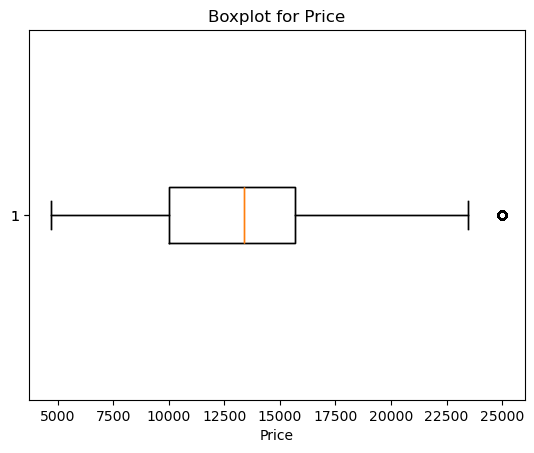

In [13]:
#Finding outliers in the price feature
plt.boxplot(final_df['Price'], vert=False)
plt.xlabel('Price')
plt.title('Boxplot for Price')
plt.show()

In [16]:
print(final_df['Price'].nlargest(5))

30     24999.0
70     24999.0
110    24999.0
150    24999.0
190    24999.0
Name: Price, dtype: float64
